# About Dataset

This data was taken from https://www.kaggle.com/datasets/hummaamqaasim/jobs-in-data/data on 11/02/2024. It has a Kaggle usability score of 10.

Attribute information:

1. work_year: The year in which the data was recorded. This field indicates the temporal context of the data, important for understanding salary trends over time.

2. job_title: The specific title of the job role, like 'Data Scientist', 'Data Engineer', or 'Data Analyst'. This column is crucial for understanding the salary distribution across various specialized roles within the data field.

3. job_category: A classification of the job role into broader categories for easier analysis. This might include areas like 'Data Analysis', 'Machine Learning', 'Data Engineering', etc.

4. salary_currency: The currency in which the salary is paid, such as USD, EUR, etc. This is important for currency conversion and understanding the actual value of the salary in a global context.

5. salary: The annual gross salary of the role in the local currency. This raw salary figure is key for direct regional salary comparisons.

6. salary_in_usd: The annual gross salary converted to United States Dollars (USD). This uniform currency conversion aids in global salary comparisons and analyses.

7. employee_residence: The country of residence of the employee. This data point can be used to explore geographical salary differences and cost-of-living variations.

8. experience_level: Classifies the professional experience level of the employee. Common categories might include 'Entry-level', 'Mid-level', 'Senior', and 'Executive', providing insight into how experience influences salary in data-related roles.

9. employment_type: Specifies the type of employment, such as 'Full-time', 'Part-time', 'Contract', etc. This helps in analyzing how different employment arrangements affect salary structures.

10. work_setting: The work setting or environment, like 'Remote', 'In-person', or 'Hybrid'. This column reflects the impact of work settings on salary levels in the data industry.

11. company_location: The country where the company is located. It helps in analyzing how the location of the company affects salary structures.

12. company_size: The size of the employer company, often categorized into small (S), medium (M), and large (L) sizes. This allows for analysis of how company size influences salary.

# Questions

The following are questions that I will answer through the analysis of the dataset:

1. Which occupation has the most and best job offers?
2. Which country/region has the most and best job offers?
3. Do the salaries and job offers increase over time?
4. What is the most prevalent type of work environment?
5. Does experience affect the salary and amount of job offers?
6. Does size of the company affect the salary and amount of job offers?
7. Does the amount of working hours affect the salary and amount of job offers?

# Reading & Cleaning the Data

## Importing Packages

In [1]:
# I'm importing the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import bokeh
import plotly.express as px

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 

## Importing the Data

In [2]:
# This is to find out the file path, so I can read in the data later
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Reading in the data
df = pd.read_csv('/kaggle/input/jobs-in-data/jobs_in_data.csv')

/kaggle/input/jobs-in-data/jobs_in_data.csv


## Cleaning the Data

In [3]:
# Removing redudant columns
df = df.drop(labels=['salary_currency', 'salary','employee_residence'],axis=1)

# Cleaning the column names
rename_map = {
    # Original column: [renamed column]
    'work_year':'year',
    'job_title':'title',
    'job_category':'category',
    'salary_in_usd':'salary',
    'work_setting':'setting',
    'company_location':'country',
    'experience_level':'level',
    'employment_type':'type',
    'company_size':'size'
}
df.rename(columns=rename_map,inplace=True)

display(df)
print('The salaries for all jobs are in USD')

,year,title,category,salary,level,type,setting,country,size
0,2023,Data DevOps Engineer,Data Engineering,95012,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,186000,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,81800,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,212000,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,93300,Senior,Full-time,In-person,United States,M
...,...,...,...,...,...,...,...,...,...
9350,2021,Data Specialist,Data Management and Strategy,165000,Senior,Full-time,Remote,United States,L
9351,2020,Data Scientist,Data Science and Research,412000,Senior,Full-time,Remote,United States,L
9352,2021,Principal Data Scientist,Data Science and Research,151000,Mid-level,Full-time,Remote,United States,L
9353,2020,Data Scientist,Data Science and Research,105000,Entry-level,Full-time,Remote,United States,S


The salaries for all jobs are in USD


# Exploratory Data Analysis

## Preliminary Analysis

In [4]:
# Checking for any null values and the data types
display(df.info())
print('There are no null values in this dataset')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9355 entries, 0 to 9354
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   year      9355 non-null   int64 
 1   title     9355 non-null   object
 2   category  9355 non-null   object
 3   salary    9355 non-null   int64 
 4   level     9355 non-null   object
 5   type      9355 non-null   object
 6   setting   9355 non-null   object
 7   country   9355 non-null   object
 8   size      9355 non-null   object
dtypes: int64(2), object(7)
memory usage: 657.9+ KB


None

There are no null values in this dataset


In [5]:
# Checking the descriptive statistics of the numerical data
df.describe()

,year,salary
count,9355.000000,9355.000000
mean,2022.760449,150299.495564
std,0.519470,63177.372024
min,2020.000000,15000.000000
25%,2023.000000,105700.000000
50%,2023.000000,143000.000000
75%,2023.000000,186723.000000
max,2023.000000,450000.000000


In [6]:
# Checking the descriptive statistics of the categorical data
df.describe(include='O')

,title,category,level,type,setting,country,size
count,9355,9355,9355,9355,9355,9355,9355
unique,125,10,4,4,3,70,3
top,Data Engineer,Data Science and Research,Senior,Full-time,In-person,United States,M
freq,2195,3014,6709,9310,5730,8132,8448


## Summary Statistics

In [7]:
# Amount of job offers per year
year_count=df['year'].value_counts()
display(year_count)

year
2023    7453
2022    1634
2021     197
2020      71
Name: count, dtype: int64

In [8]:
# The overall amount of job offers per category from 2020 to 2023
job_count=df['category'].value_counts()
display(job_count)

category
Data Science and Research         3014
Data Engineering                  2260
Data Analysis                     1457
Machine Learning and AI           1428
Leadership and Management          503
BI and Visualization               313
Data Architecture and Modeling     259
Data Management and Strategy        61
Data Quality and Operations         55
Cloud and Database                   5
Name: count, dtype: int64

In [9]:
# The overall number of job offers per setting from 2020 to 2023
setting_count=df['setting'].value_counts()
display(setting_count)

setting
In-person    5730
Remote       3434
Hybrid        191
Name: count, dtype: int64

In [10]:
# The overall number of job offers per experience level from 2020 to 2023
level_count=df['level'].value_counts()
display(level_count)

level
Senior         6709
Mid-level      1869
Entry-level     496
Executive       281
Name: count, dtype: int64

In [11]:
# The overall number of job offers per company size from 2020 to 2023
size_count=df['size'].value_counts()
display(size_count)

size
M    8448
L     748
S     159
Name: count, dtype: int64

In [12]:
# The overall number of job offers per type from 2020 to 2023
type_count=df['type'].value_counts()
display(type_count)

type
Full-time    9310
Contract       19
Part-time      15
Freelance      11
Name: count, dtype: int64

In [13]:
# The number of job offers per category per year
yearly_job_count=df.groupby(by='year')['category'].value_counts()
display(yearly_job_count)

year  category                      
2020  Data Science and Research           29
      Data Engineering                    17
      Data Analysis                       15
      Machine Learning and AI             10
2021  Data Science and Research           72
      Data Engineering                    45
      Machine Learning and AI             37
      Data Analysis                       28
      Leadership and Management            9
      Data Architecture and Modeling       5
      Data Management and Strategy         1
2022  Data Science and Research          500
      Data Engineering                   499
      Data Analysis                      289
      Machine Learning and AI            186
      Leadership and Management           80
      Data Architecture and Modeling      46
      Data Management and Strategy        12
      Data Quality and Operations         12
      BI and Visualization                 8
      Cloud and Database                   2
2023  Data Science

In [14]:
# The number of job offers per setting per year
yearly_setting_count=df.groupby(by='year')['setting'].value_counts()
display(yearly_setting_count)

year  setting  
2020  Remote         35
      Hybrid         20
      In-person      16
2021  Remote        107
      Hybrid         64
      In-person      26
2022  Remote        872
      In-person     708
      Hybrid         54
2023  In-person    4980
      Remote       2420
      Hybrid         53
Name: count, dtype: int64

In [15]:
# The number of job offers per experience level per year
yearly_level_count=df.groupby(by='year')['level'].value_counts()
display(yearly_level_count)

year  level      
2020  Mid-level        29
      Entry-level      20
      Senior           18
      Executive         4
2021  Mid-level        78
      Senior           69
      Entry-level      40
      Executive        10
2022  Senior         1133
      Mid-level       349
      Entry-level     112
      Executive        40
2023  Senior         5489
      Mid-level      1413
      Entry-level     324
      Executive       227
Name: count, dtype: int64

In [16]:
# The number of job offers per company size per year
yearly_size_count=df.groupby(by='year')['size'].value_counts()
display(yearly_size_count)

year  size
2020  L         32
      S         22
      M         17
2021  L        110
      M         49
      S         38
2022  M       1404
      L        182
      S         48
2023  M       6978
      L        424
      S         51
Name: count, dtype: int64

In [17]:
# The number of job offers per work hours per year
yearly_type_count=df.groupby(by='year')['type'].value_counts()
display(yearly_type_count)

year  type     
2020  Full-time      65
      Contract        3
      Part-time       2
      Freelance       1
2021  Full-time     187
      Part-time       4
      Contract        3
      Freelance       3
2022  Full-time    1621
      Part-time       6
      Contract        4
      Freelance       3
2023  Full-time    7437
      Contract        9
      Freelance       4
      Part-time       3
Name: count, dtype: int64

In [18]:
# Minimum, average and maximum salaries per category
job_salary=df.groupby(by='category')['salary'].agg(['min','mean','max'])
job_salary

,min,mean,max
category,,,
BI and Visualization,15000,135092.102236,259900
Cloud and Database,115000,155000.000000,190000
Data Analysis,15000,108505.721345,430967
Data Architecture and Modeling,52500,156002.359073,376080
Data Engineering,18000,146197.656195,385000
Data Management and Strategy,46400,103139.934426,250000
Data Quality and Operations,23753,100879.472727,289120
Data Science and Research,16000,163758.575979,450000
Leadership and Management,20000,145476.019881,430640


In [19]:
# Minimum, average and maximum salaries per setting
setting_salary=df.groupby(by='setting')['salary'].agg(['min','mean','max'])
setting_salary

,min,mean,max
setting,,,
Hybrid,18000,88912.287958,423000
In-person,15000,155524.120942,450000
Remote,15000,144996.016599,416000


In [20]:
# Minimum, average and maximum salaries per experience level
level_salary=df.groupby(by='level')['salary'].agg(['min','mean','max'])
level_salary

,min,mean,max
level,,,
Entry-level,15000,88534.776210,281700
Executive,15000,189462.914591,416000
Mid-level,15000,117523.918138,450000
Senior,18381,162356.126099,412000


In [21]:
# Minimum, average and maximum salaries per company size
size_salary=df.groupby(by='size')['salary'].agg(['min','mean','max'])
size_salary

,min,mean,max
size,,,
L,15000,141097.163102,423000
M,15000,152237.089252,450000
S,15966,90642.597484,416000


In [22]:
# Minimum, average and maximum salaries per working hours
type_salary=df.groupby(by='type')['salary'].agg(['min','mean','max'])
type_salary

,min,mean,max
type,,,
Contract,25500,117109.368421,416000
Freelance,20000,53868.636364,100000
Full-time,15000,150630.092052,450000
Part-time,15966,57866.066667,133000


In [23]:
# Minimum, average and maximum salaries per country
country_salary=df.groupby(by='country')['salary'].agg(['min','mean','max'])
country_salary

,min,mean,max
country,,,
Algeria,100000,100000.000000,100000
American Samoa,50000,50000.000000,50000
Andorra,50745,50745.000000,50745
Argentina,48000,62000.000000,80000
Armenia,50000,50000.000000,50000
...,...,...,...
Turkey,18381,22313.600000,28016
Ukraine,50000,121333.333333,240000
United Arab Emirates,65000,100000.000000,120000


In [24]:
# Minimum, average and maximum salaries per category per year
yearly_job_salary=df.groupby(by=['year','category'])['salary'].agg(['min','mean','max'])
yearly_job_salary

min           mean     max
year category                                                     
2020 Data Analysis                    15000   68014.666667  135000
     Data Engineering                 47899   94575.823529  188000
     Data Science and Research        21669  129538.827586  450000
     Machine Learning and AI          15966  113276.400000  260000
2021 Data Analysis                    42028   87818.500000  200000
     Data Architecture and Modeling   99703  169940.600000  250000
     Data Engineering                 18000  107192.288889  276000
     Data Management and Strategy    165000  165000.000000  165000
     Data Science and Research        20000  107517.819444  416000
     Leadership and Management        50000  131892.888889  235000
     Machine Learning and AI          15000  101396.891892  423000
2022 BI and Visualization             15000  100875.000000  200000
     Cloud and Database              160000  175000.000000  190000
     Data Analysis                    15000  107384.224913  430967
     Data Architecture and Modeling   63000  166091.543478  345600
     Data Engineering                 24000  139629.909820  324000
     Data Management and Strategy     68293  114024.416667  221300
     Data Quality and Operations      60000   84770.833333  123000
     Data Science and Research        16455  143343.794000  380000
     Leadership and Management        20000  136901.437500  405000
     Machine Learning and AI          21013  144289.064516  375000
2023 BI and Visualization             18381  135989.600000  259900
     Cloud and Database              115000  141666.666667  170000
     Data Analysis                    17000  109848.584000  385000
     Data Architecture and Modeling   52500  153436.043269  376080
     Data Engineering                 18000  149676.242496  385000
     Data Management and Strategy     46400   99130.062500  250000
     Data Quality and Operations      23753  105374.906977  289120
     Data Science and Research        16000  170078.135930  405000
     Leadership and Management        37573  147428.229469  430640
     Machine Learning and AI          20000  187266.857741  392000

In [25]:
# Minimum, average and maximum salaries per setting per year
yearly_setting_salary=df.groupby(by=['year','setting'])['salary'].agg(['min','mean','max'])
yearly_setting_salary

min           mean     max
year setting                                
2020 Hybrid     21669   89436.350000  250000
     In-person  15000  101415.875000  450000
     Remote     15966  117314.800000  412000
2021 Hybrid     19073   85950.125000  423000
     In-person  18000  114444.346154  276000
     Remote     15000  116831.000000  416000
2022 Hybrid     20000   89460.092593  375000
     In-person  15000  135186.935028  430967
     Remote     15000  138544.384174  405000
2023 Hybrid     18000   91733.339623  399880
     In-person  21593  158803.746185  430640
     Remote     16000  148966.397934  385000

In [26]:
# Minimum, average and maximum salaries per experience level per year
yearly_level_salary=df.groupby(by=['year','level'])['salary'].agg(['min','mean','max'])
yearly_level_salary

min           mean     max
year level                                    
2020 Entry-level  15966   71248.250000  250000
     Executive    15000  179958.250000  325000
     Mid-level    20000   95578.724138  450000
     Senior       45618  144489.888889  412000
2021 Entry-level  15000   69370.125000  225000
     Executive    69741  186128.000000  416000
     Mid-level    18000   92640.923077  423000
     Senior       18907  132104.362319  276000
2022 Entry-level  15000   81981.955357  200000
     Executive    84053  191059.075000  324000
     Mid-level    15000  104652.441261  430967
     Senior       25000  148284.072374  405000
2023 Entry-level  16000   94233.024691  281700
     Executive    55000  189496.048458  375500
     Mid-level    17000  122527.053079  430640
     Senior       18381  165699.649663  399880

In [27]:
# Minimum, average and maximum salaries per company size per year
yearly_size_salary=df.groupby(by=['year','size'])['salary'].agg(['min','mean','max'])
yearly_size_salary

min           mean     max
year size                              
2020 L     42000  119074.718750  412000
     M     15000  113195.058824  450000
     S     15966   81031.454545  260000
2021 L     15000  118540.863636  423000
     M     18907   87817.326531  200000
     S     18000   95650.894737  416000
2022 L     15000  128632.170330  405000
     M     15000  137949.564815  430967
     S     20000   88784.458333  275000
2023 L     16000  153961.643868  405000
     M     18000  155659.268558  430640
     S     20000   92805.745098  240000

In [28]:
# Minimum, average and maximum salaries per working hours per year
yearly_type_salary=df.groupby(by=['year','type'])['salary'].agg(['min','mean','max'])
yearly_type_salary

min           mean     max
year type                                    
2020 Contract    44753   68251.000000  100000
     Freelance   60000   60000.000000   60000
     Full-time   15000  111000.169231  450000
     Part-time   15966   18817.500000   21669
2021 Contract   105000  263666.666667  416000
     Freelance   20000   41851.666667   60000
     Full-time   15000  106349.197861  423000
     Part-time   19073   43355.750000   69741
2022 Contract    30469   69545.250000   97712
     Freelance   50000   83333.333333  100000
     Full-time   15000  135952.032079  430967
     Part-time   25216   74578.833333  125404
2023 Contract    25500  105682.666667  323905
     Freelance   21000   39250.000000   50000
     Full-time   16000  155289.176012  430640
     Part-time   18160   69820.000000  133000

In [29]:
# Minimum, average and maximum salaries per country per year
yearly_country_salary=df.groupby(by=['year','country'])['salary'].agg(['min','mean','max'])
yearly_country_salary

min           mean     max
year country                                      
2020 Austria          74130   82683.500000   91237
     Canada           15000   58952.333333  117104
     Croatia          45618   45618.000000   45618
     Denmark          45896   45896.000000   45896
     France           39916   50066.400000   70139
...                     ...            ...     ...
2023 Switzerland     104024  113331.000000  122638
     Turkey           18381   19190.500000   20000
     Ukraine          50000  121333.333333  240000
     United Kingdom   32974  111020.623529  430640
     United States    20000  160580.686778  405000

[144 rows x 3 columns]

In [30]:
# Top 15 countires by overall job offers from 2020 to 2023
country_job_count=df['country'].value_counts().head(15)
country_job_count

country
United States     8132
United Kingdom     449
Canada             226
Spain              113
Germany             72
France              50
Australia           24
Portugal            24
Netherlands         21
Brazil              17
Colombia            16
Greece              14
Italy               13
Mexico              10
Poland              10
Name: count, dtype: int64

# Data Visualisation

## Visualisation 1: Number of Job Offers per Category

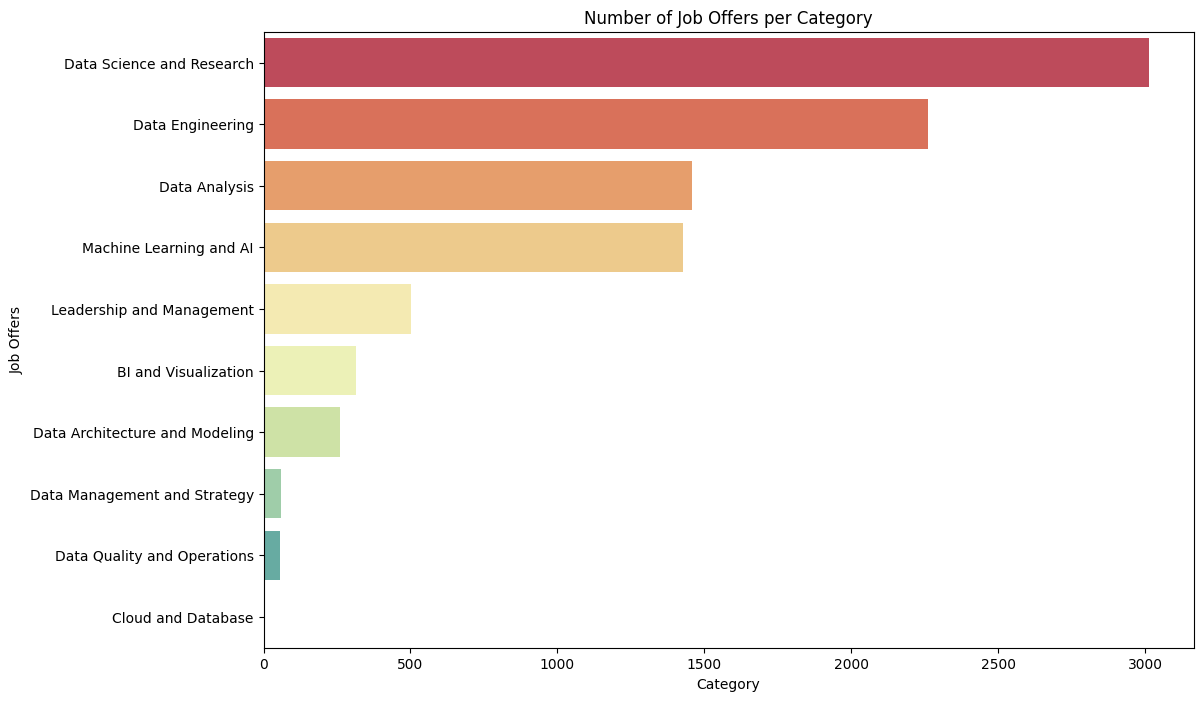

In [31]:
plt.figure(figsize=(12,8))
sns.barplot(x=job_count.values, y=job_count.index,palette='Spectral')
plt.title('Number of Job Offers per Category')
plt.xlabel('Category')
plt.ylabel('Job Offers')
plt.show()

## Visualisation 2: Number of Job Offers per Category per Year

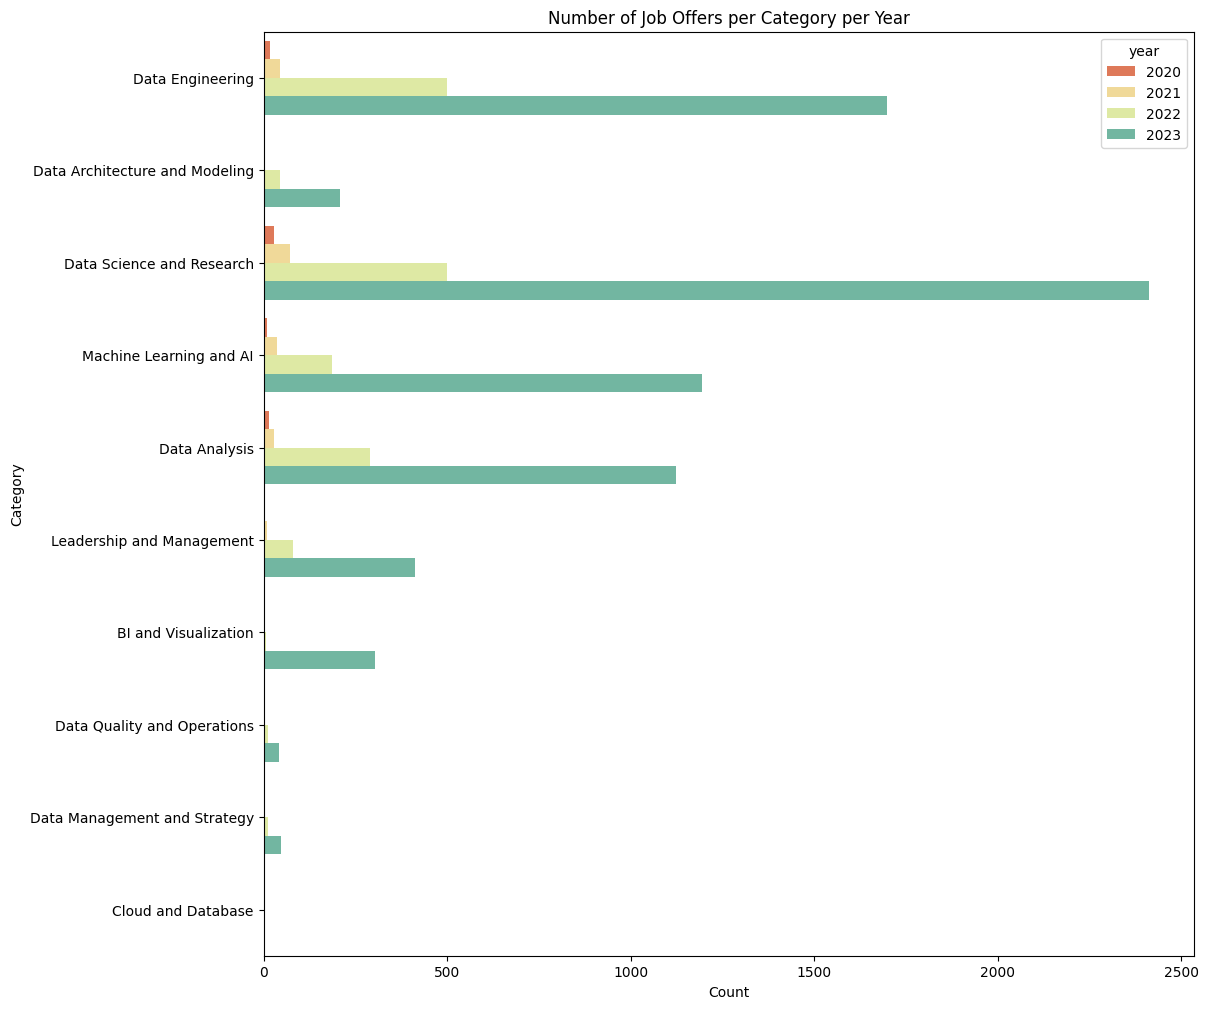

In [32]:
plt.figure(figsize=(12,12))
sns.countplot(data=df,y='category',hue='year', palette='Spectral')
plt.title('Number of Job Offers per Category per Year')
plt.xlabel('Count')
plt.ylabel('Category')
plt.show()

## Visualisation 3: Distribution of Salaries per Category

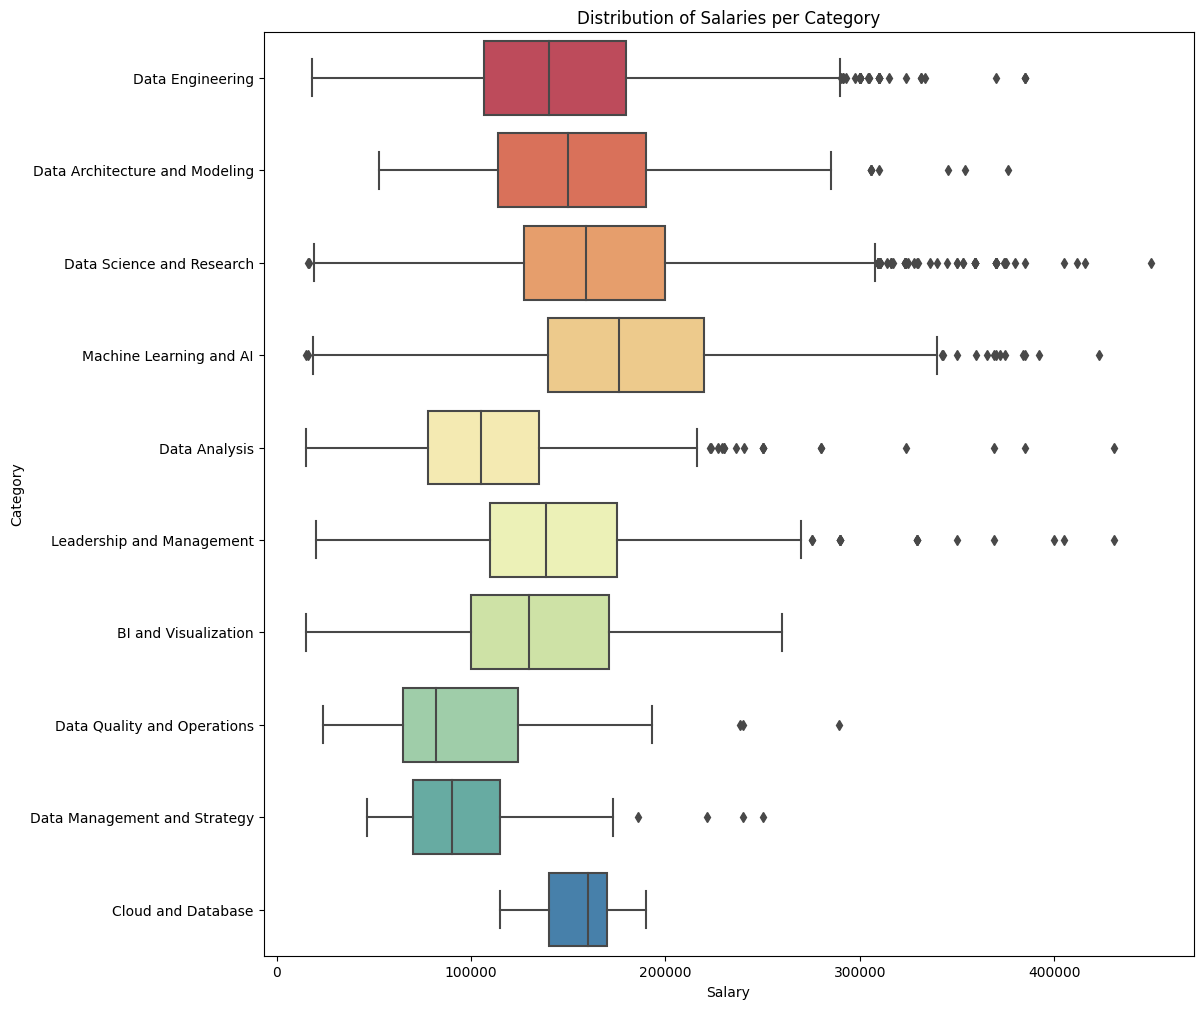

In [33]:
plt.figure(figsize=(12,12))
sns.boxplot(y='category',x='salary',data=df,palette='Spectral')
plt.title('Distribution of Salaries per Category')
plt.xlabel('Salary')
plt.ylabel('Category')
plt.show()

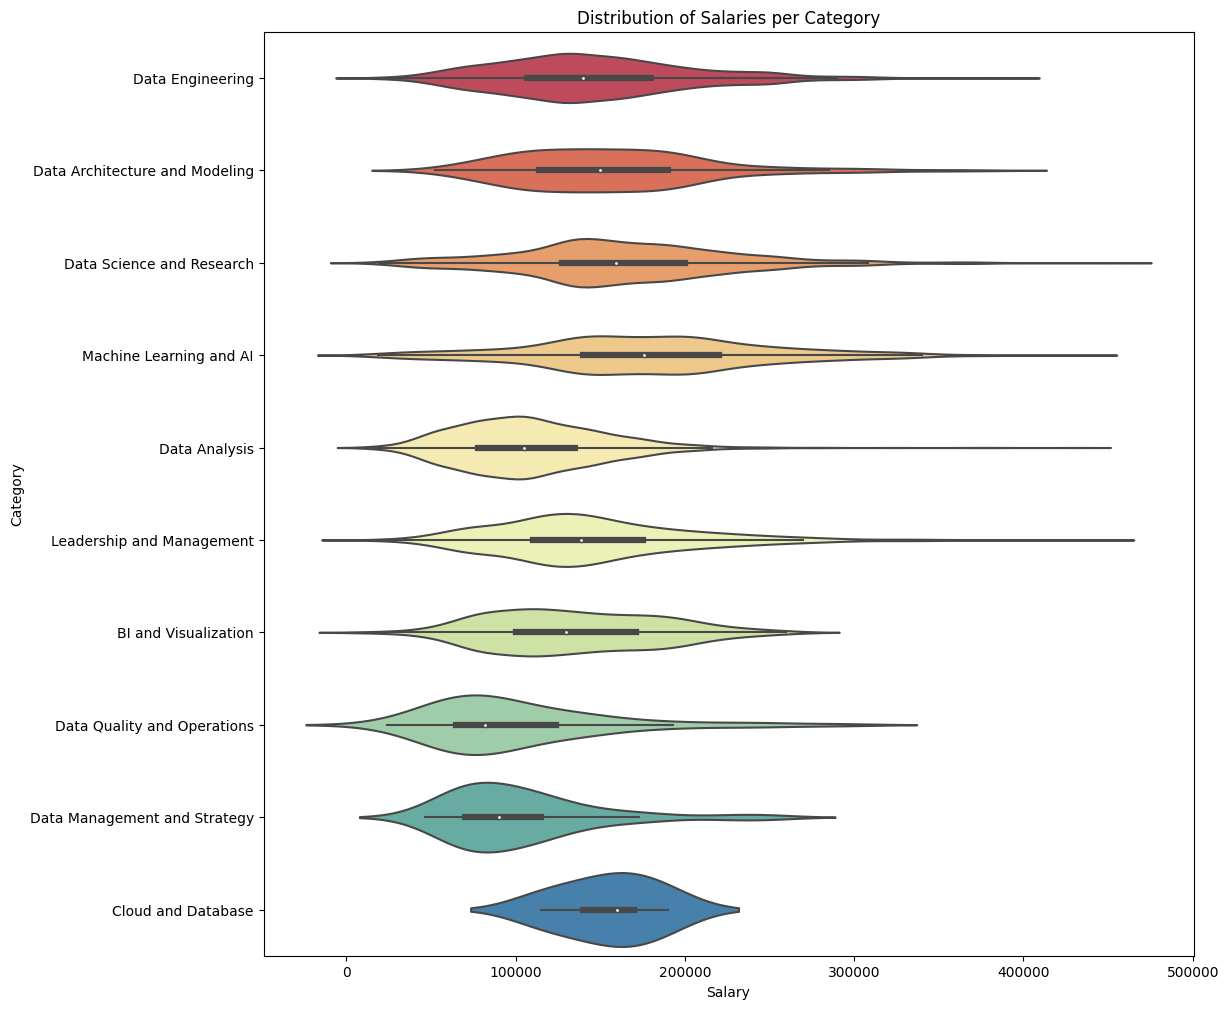

In [34]:
plt.figure(figsize=(12,12))
sns.violinplot(y='category',x='salary',data=df,palette='Spectral')
plt.title('Distribution of Salaries per Category')
plt.xlabel('Salary')
plt.ylabel('Category')
plt.show()

## Visualisation 4: Number of Job Offers per Country

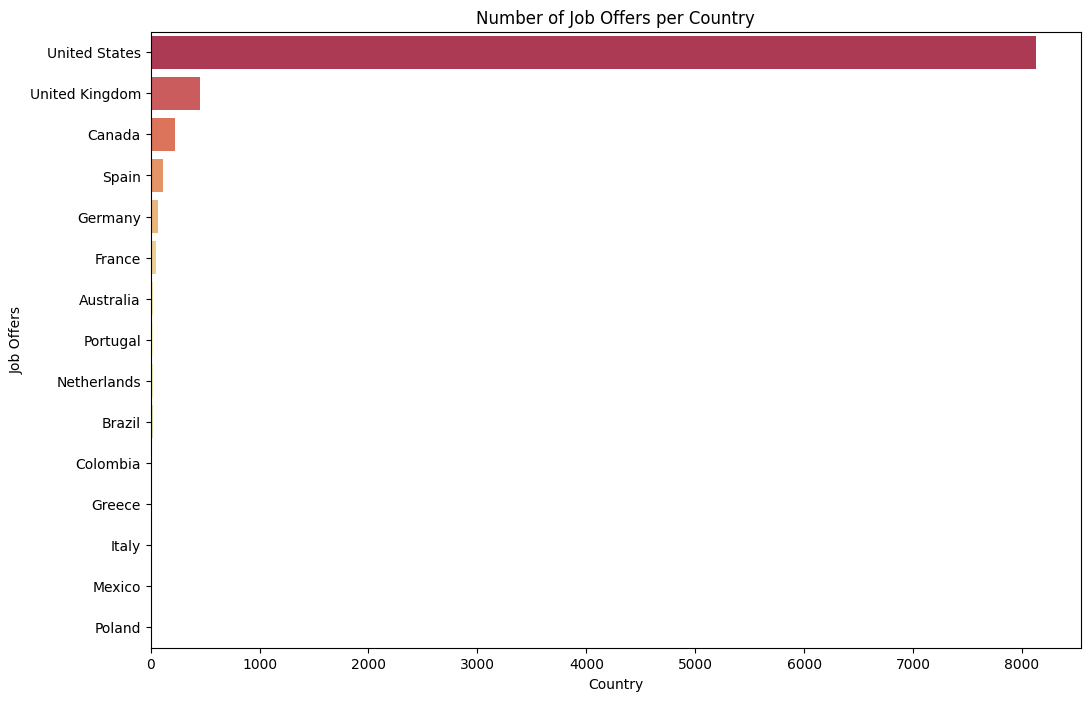

In [35]:
plt.figure(figsize=(12,8))
sns.barplot(x=country_job_count.values, y=country_job_count.index, palette='Spectral')
plt.title('Number of Job Offers per Country')
plt.xlabel('Country')
plt.ylabel('Job Offers')
plt.show()

## Visualisation 4: Salaries per Country

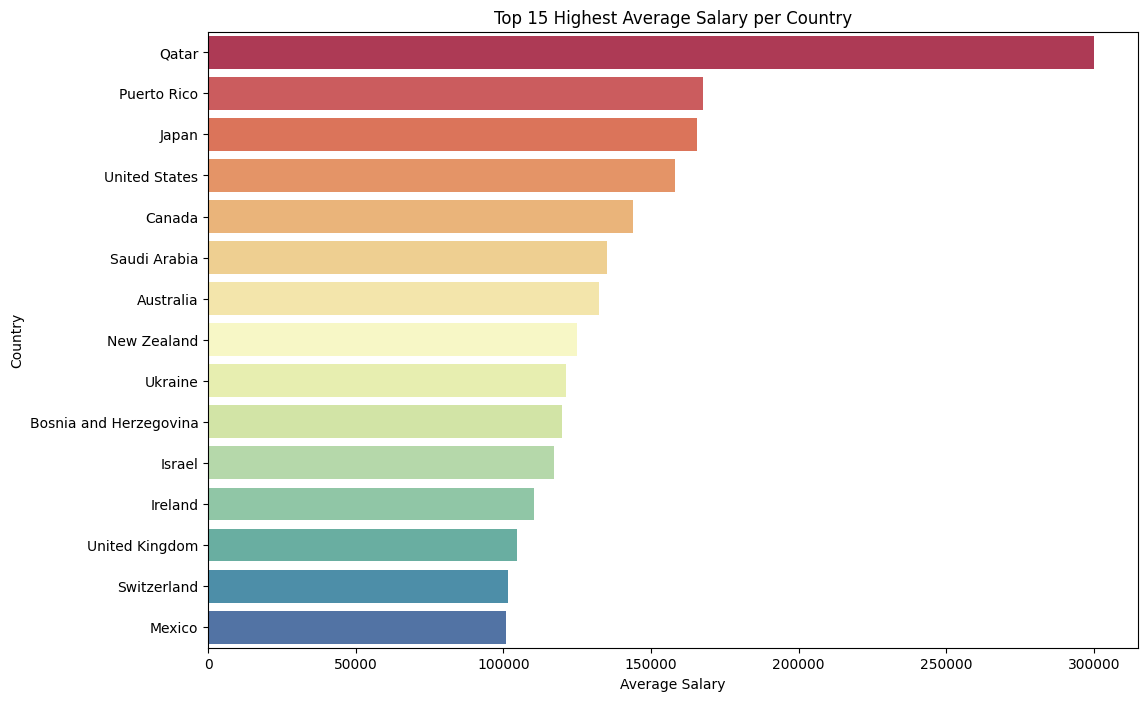

In [36]:
country_salary_vis_top=country_salary.sort_values(by='mean',ascending=False).head(15)
plt.figure(figsize=(12,8))
sns.barplot(x=country_salary_vis_top['mean'], y=country_salary_vis_top.index, palette='Spectral')
plt.title('Top 15 Highest Average Salary per Country')
plt.xlabel('Average Salary')
plt.ylabel('Country')
plt.show()

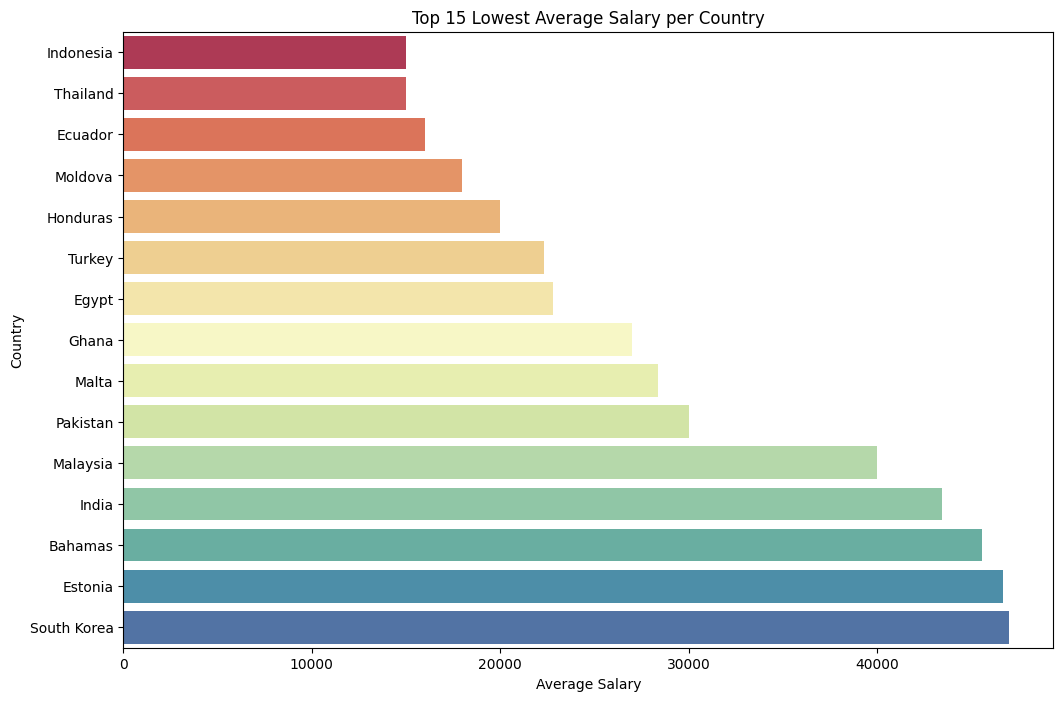

In [37]:
country_salary_vis_low=country_salary.sort_values(by='mean',ascending=True).head(15)
plt.figure(figsize=(12,8))
sns.barplot(x=country_salary_vis_low['mean'], y=country_salary_vis_low.index, palette='Spectral')
plt.title('Top 15 Lowest Average Salary per Country')
plt.xlabel('Average Salary')
plt.ylabel('Country')
plt.show()

## Visualisation 5: Number of Job Offers per Year

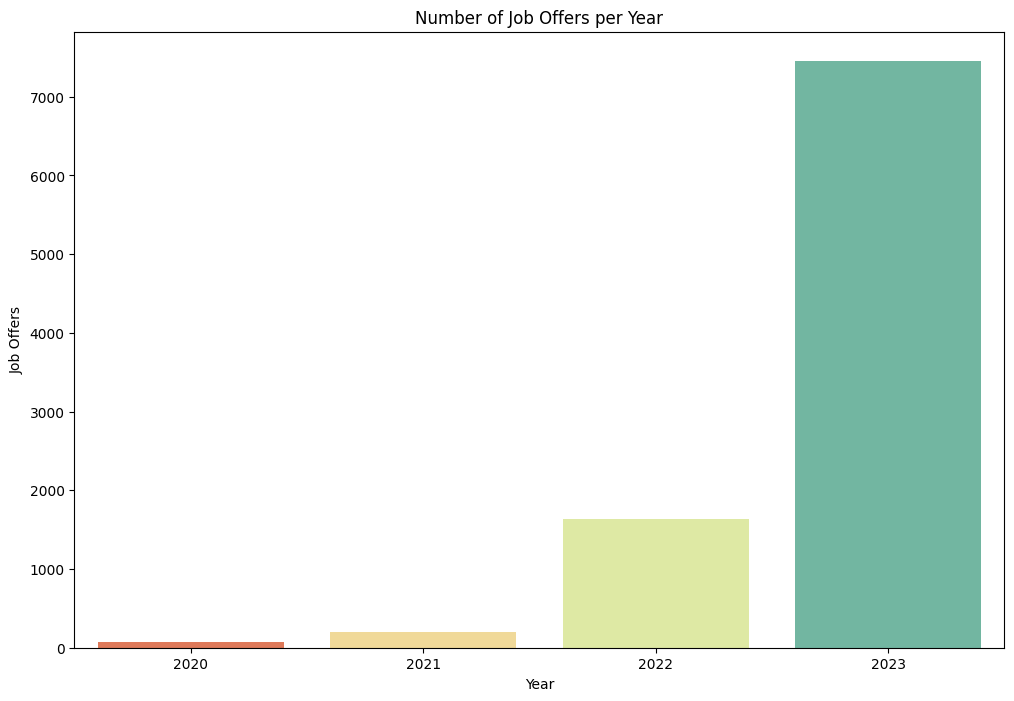

In [38]:
# Number of Job Offers per Year (barplot)
plt.figure(figsize=(12,8))
sns.barplot(x=year_count.index, y=year_count.values,palette='Spectral')
plt.title('Number of Job Offers per Year')
plt.xlabel('Year')
plt.ylabel('Job Offers')
plt.show()

## Visualisation 6: Salary Distribution by Year

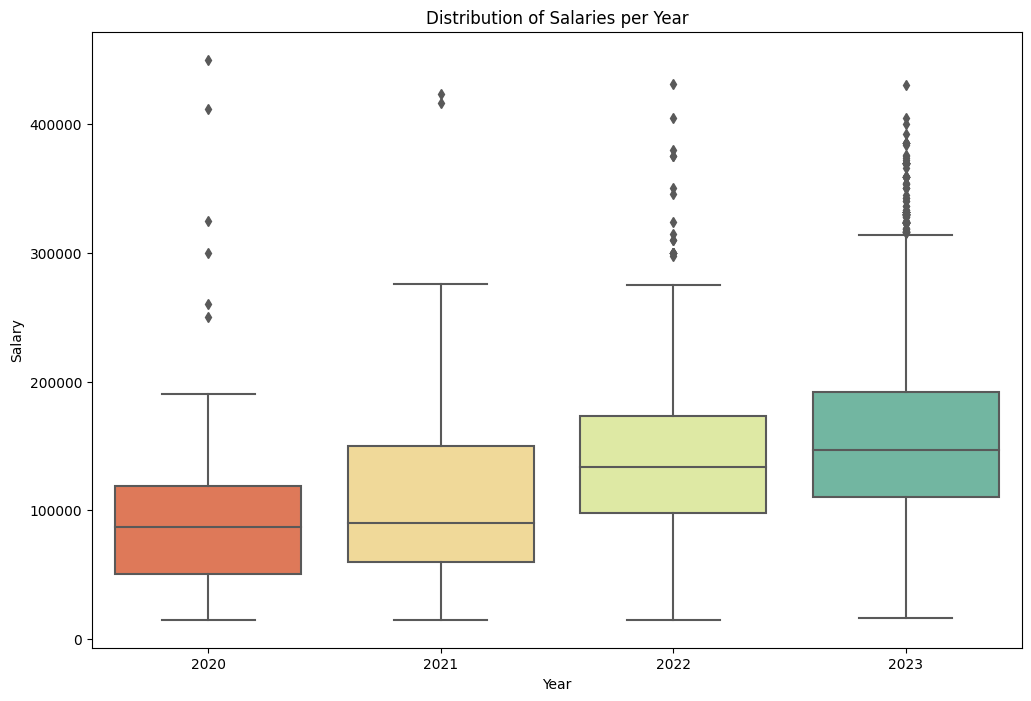

In [39]:
plt.figure(figsize=(12,8))
sns.boxplot(x='year',y='salary',data=df,palette='Spectral')
plt.title('Distribution of Salaries per Year')
plt.xlabel('Year')
plt.ylabel('Salary')
plt.show()

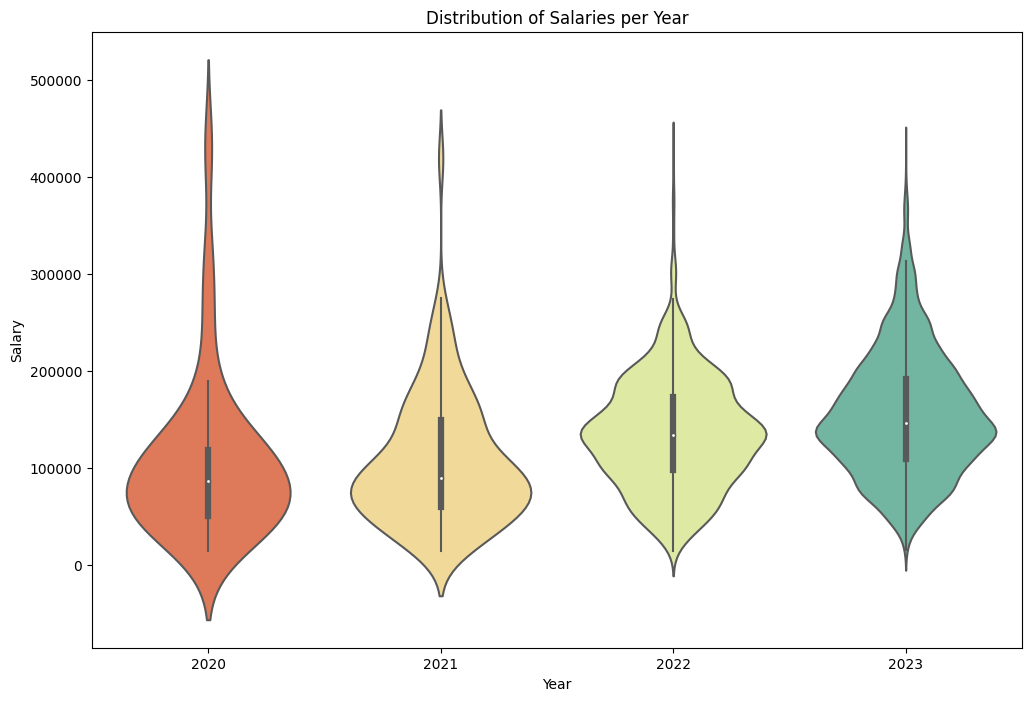

In [40]:
plt.figure(figsize=(12,8))
sns.violinplot(x='year',y='salary',data=df,palette='Spectral')
plt.title('Distribution of Salaries per Year')
plt.xlabel('Year')
plt.ylabel('Salary')
plt.show()

## Visualisation 7: Job Offers per Work Setting

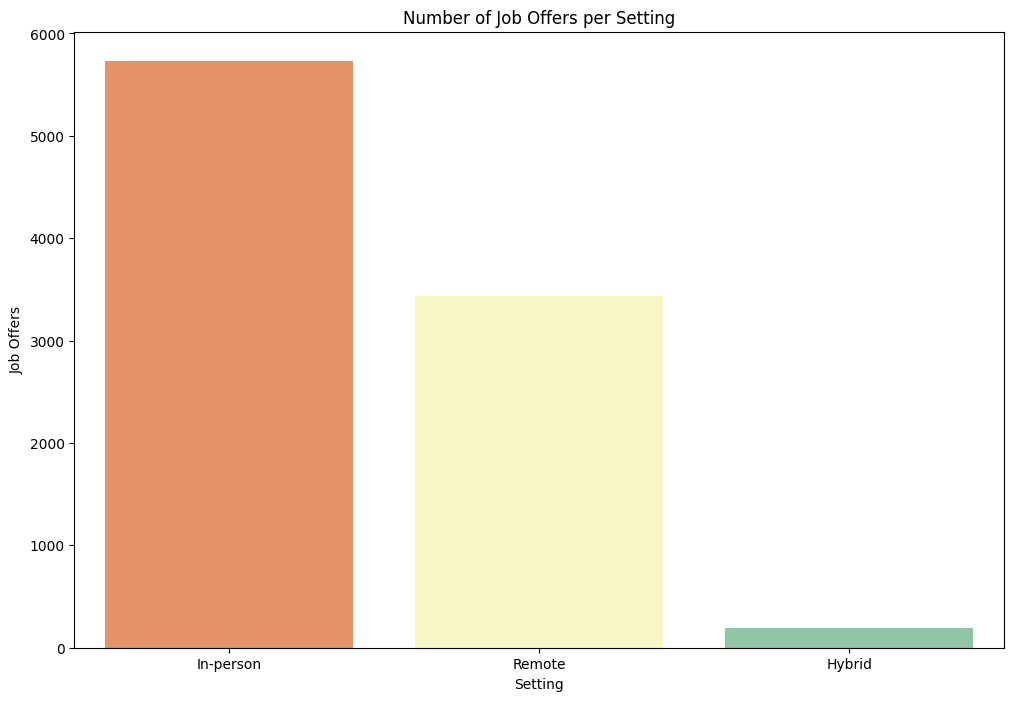

In [41]:
plt.figure(figsize=(12,8))
sns.barplot(x=setting_count.index, y=setting_count.values,palette='Spectral')
plt.title('Number of Job Offers per Setting')
plt.xlabel('Setting')
plt.ylabel('Job Offers')
plt.show()

## Visualisation 8: Job Offers per Work Setting per Year

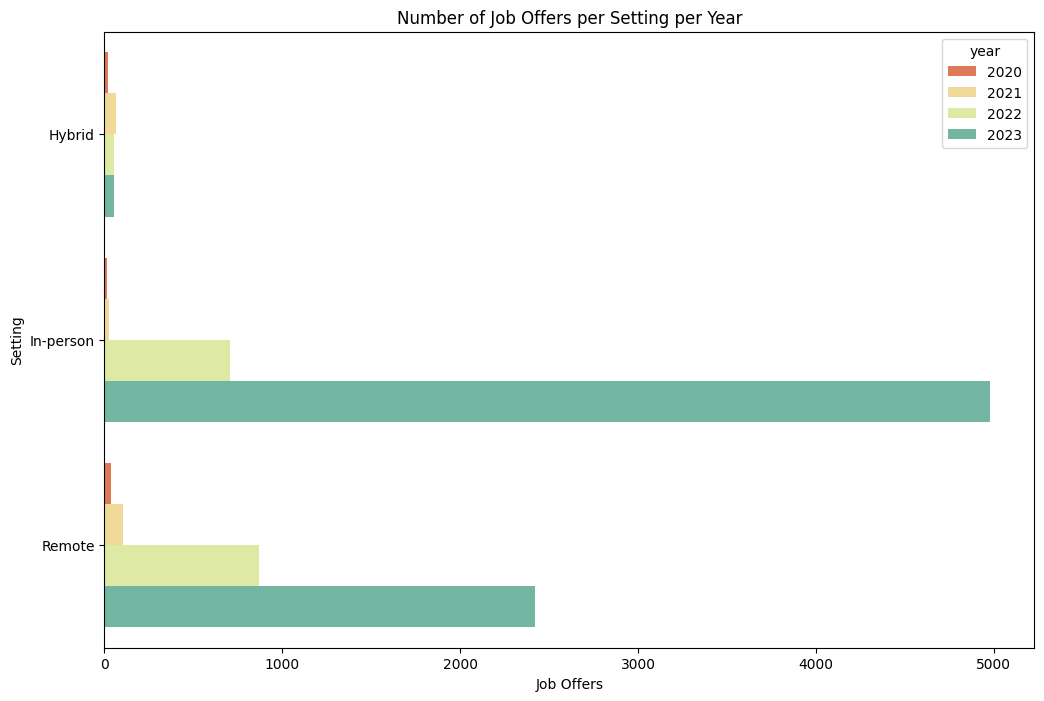

In [42]:
plt.figure(figsize=(12,8))
sns.countplot(data=df,y='setting',hue='year', palette='Spectral')
plt.title('Number of Job Offers per Setting per Year')
plt.xlabel('Job Offers')
plt.ylabel('Setting')
plt.show()

## Visualisation 9: Salary Distribution by Work Setting

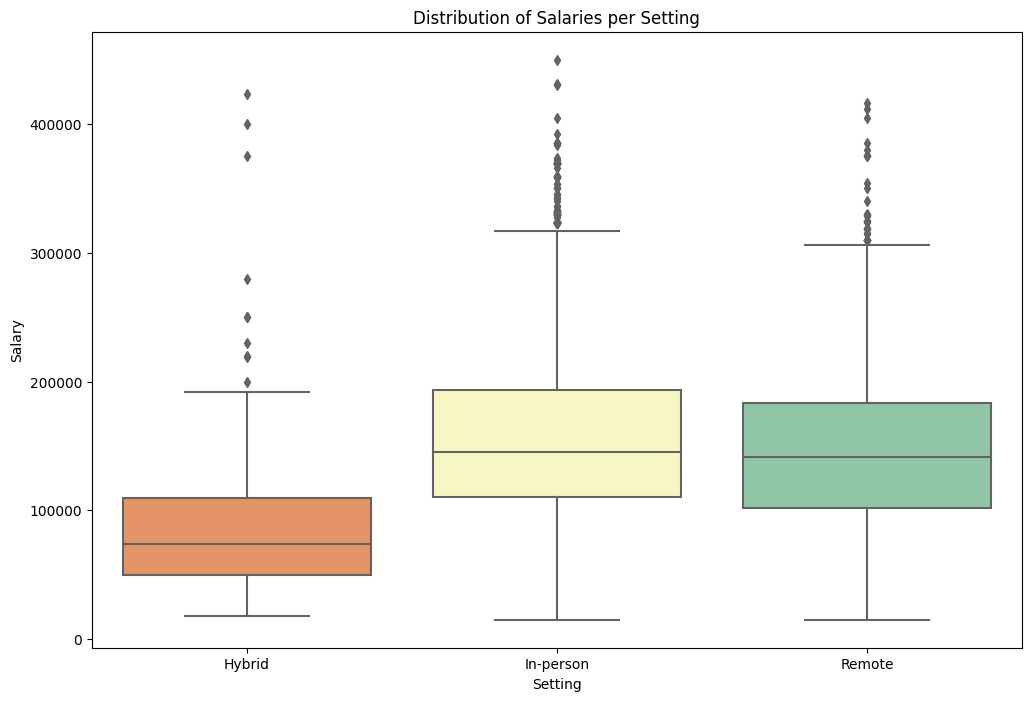

In [43]:
plt.figure(figsize=(12,8))
sns.boxplot(x='setting',y='salary',data=df,palette='Spectral')
plt.title('Distribution of Salaries per Setting')
plt.xlabel('Setting')
plt.ylabel('Salary')
plt.show()

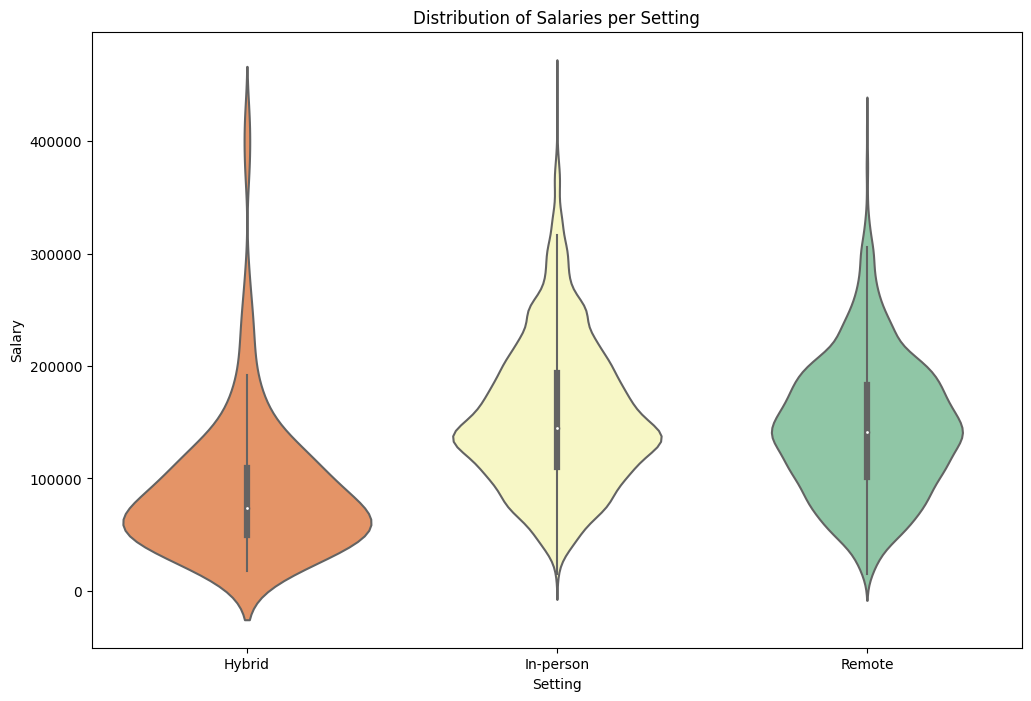

In [44]:
plt.figure(figsize=(12,8))
sns.violinplot(x='setting',y='salary',data=df,palette='Spectral')
plt.title('Distribution of Salaries per Setting')
plt.xlabel('Setting')
plt.ylabel('Salary')
plt.show()

## Visualisation 10: Job Offers by Experience

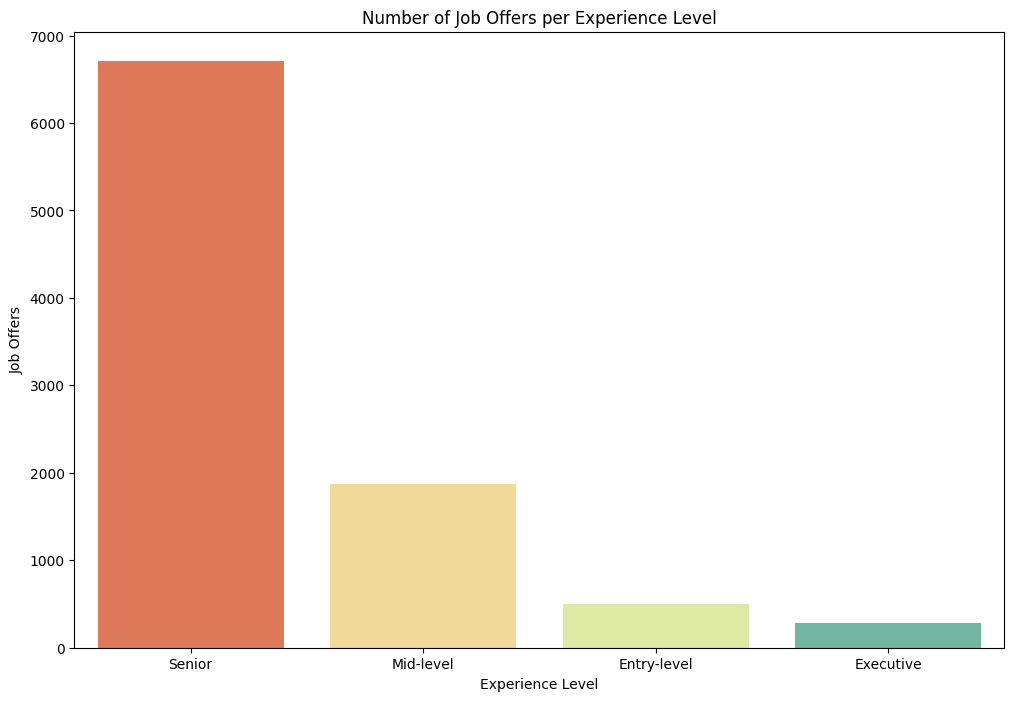

In [45]:
plt.figure(figsize=(12,8))
sns.barplot(x=level_count.index, y=level_count.values,palette='Spectral')
plt.title('Number of Job Offers per Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Job Offers')
plt.show()

## Visualisation 11: Job Offers per Experience per Year

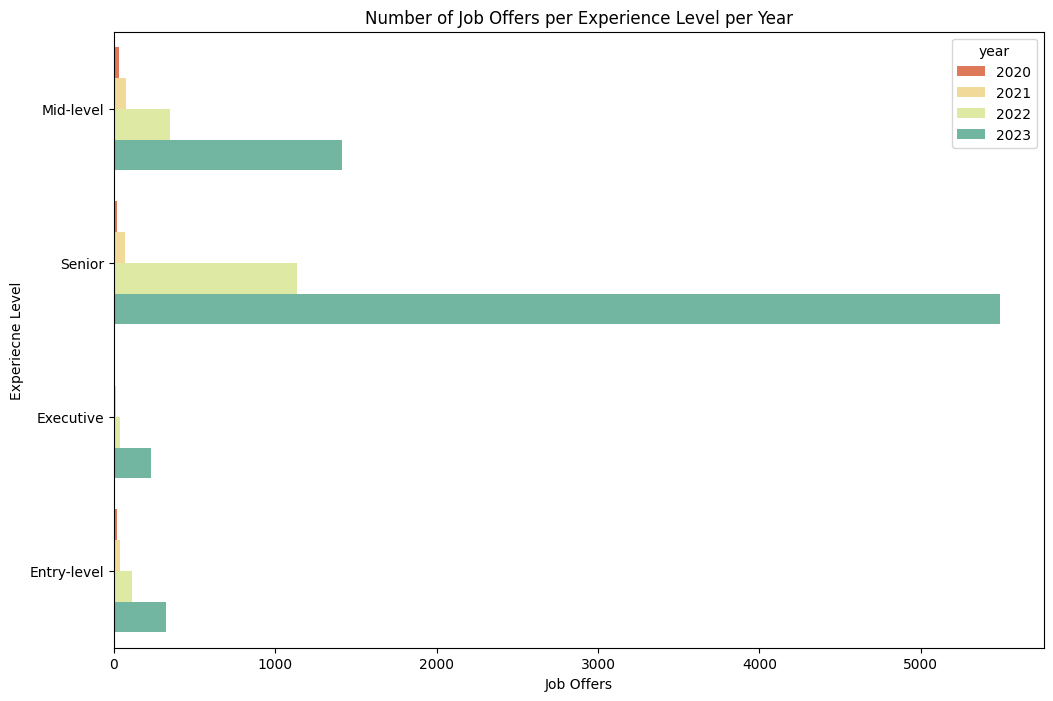

In [46]:
plt.figure(figsize=(12,8))
sns.countplot(data=df,y='level',hue='year', palette='Spectral')
plt.title('Number of Job Offers per Experience Level per Year')
plt.xlabel('Job Offers')
plt.ylabel('Experiecne Level')
plt.show()

## Visualisation 12: Salary Distribution by Experience

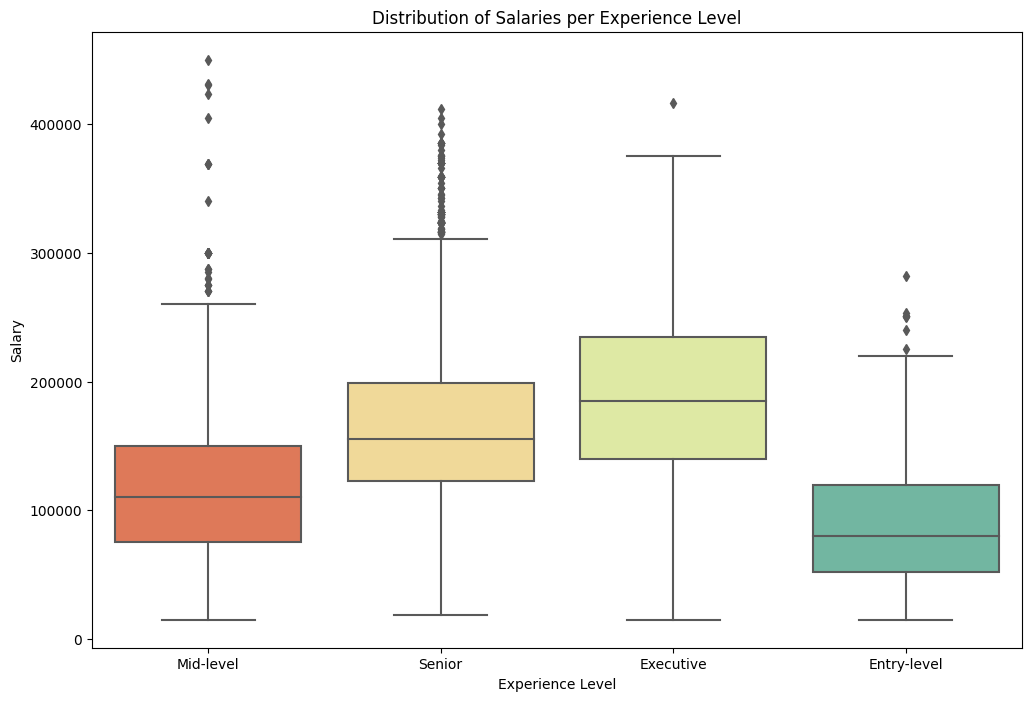

In [47]:
plt.figure(figsize=(12,8))
sns.boxplot(x='level',y='salary',data=df,palette='Spectral')
plt.title('Distribution of Salaries per Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Salary')
plt.show()

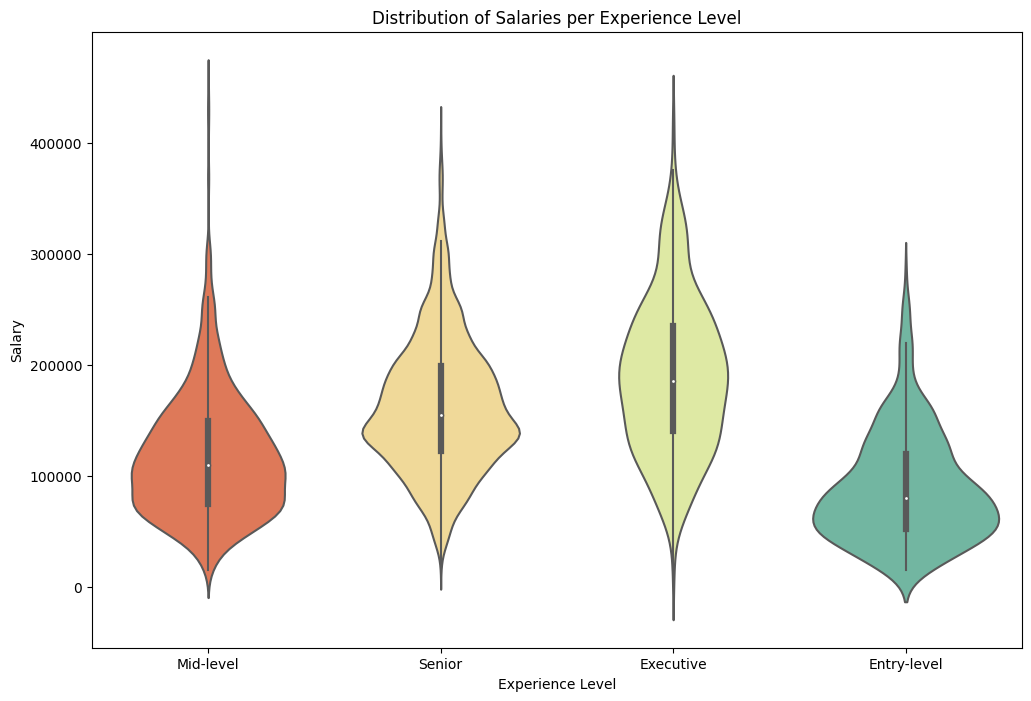

In [48]:
plt.figure(figsize=(12,8))
sns.violinplot(x='level',y='salary',data=df,palette='Spectral')
plt.title('Distribution of Salaries per Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Salary')
plt.show()

## Visualisation 13: Job Offers by Size of the Company

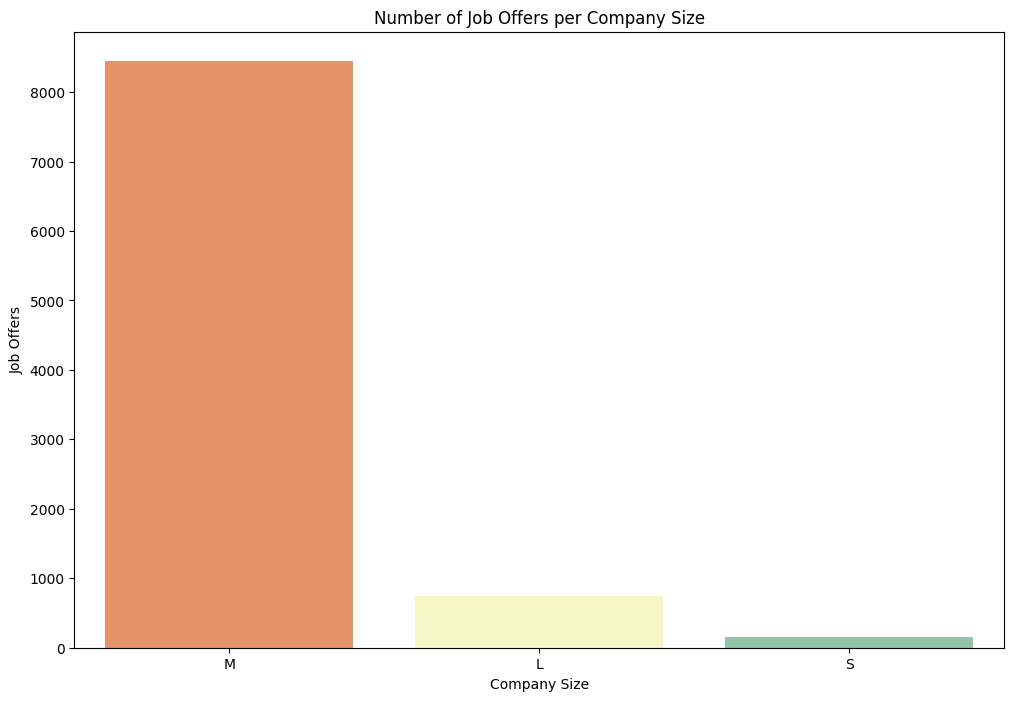

In [49]:
plt.figure(figsize=(12,8))
sns.barplot(x=size_count.index, y=size_count.values,palette='Spectral')
plt.title('Number of Job Offers per Company Size')
plt.xlabel('Company Size')
plt.ylabel('Job Offers')
plt.show()

## Visualisation 14: Job Offers per Company Size per Year

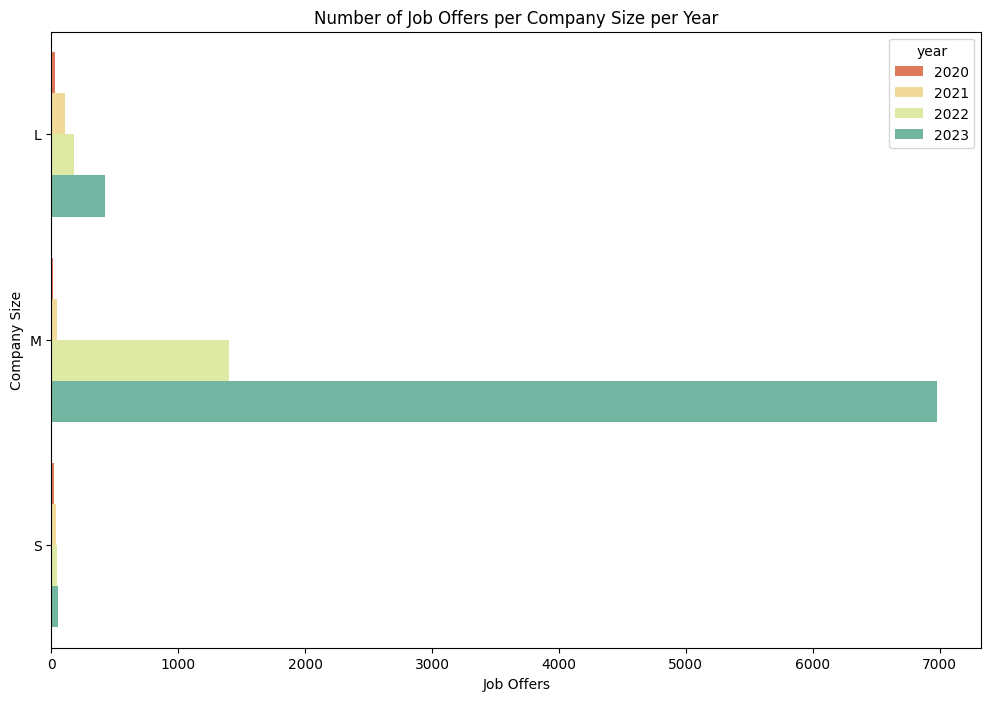

In [50]:
plt.figure(figsize=(12,8))
sns.countplot(data=df,y='size',hue='year', palette='Spectral')
plt.title('Number of Job Offers per Company Size per Year')
plt.xlabel('Job Offers')
plt.ylabel('Company Size')
plt.show()

## Visualisation 15: Salary Distribution by Size of the Company

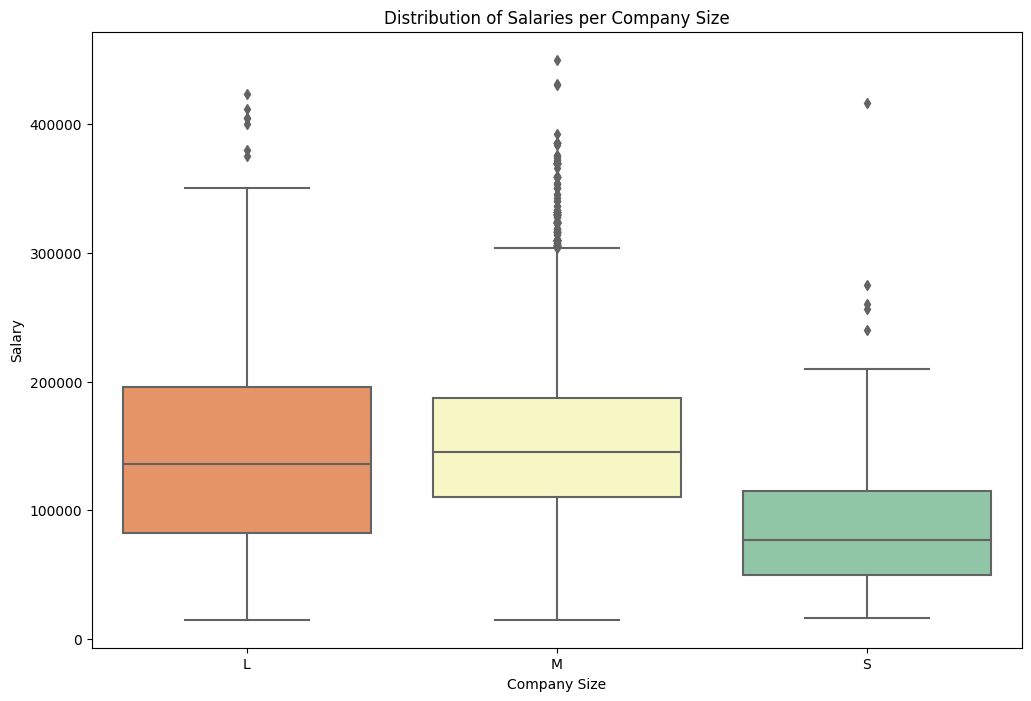

In [51]:
plt.figure(figsize=(12,8))
sns.boxplot(x='size',y='salary',data=df,palette='Spectral')
plt.title('Distribution of Salaries per Company Size')
plt.xlabel('Company Size')
plt.ylabel('Salary')
plt.show()

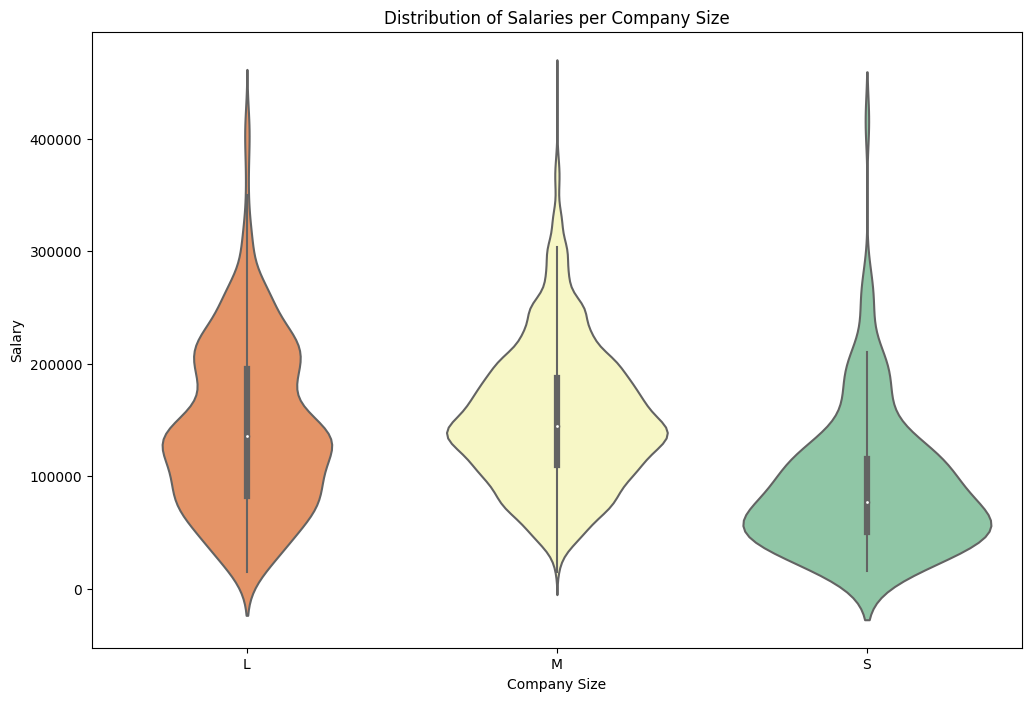

In [52]:
plt.figure(figsize=(12,8))
sns.violinplot(x='size',y='salary',data=df,palette='Spectral')
plt.title('Distribution of Salaries per Company Size')
plt.xlabel('Company Size')
plt.ylabel('Salary')
plt.show()

## Visualisation 16: Job Offers by Work Hours

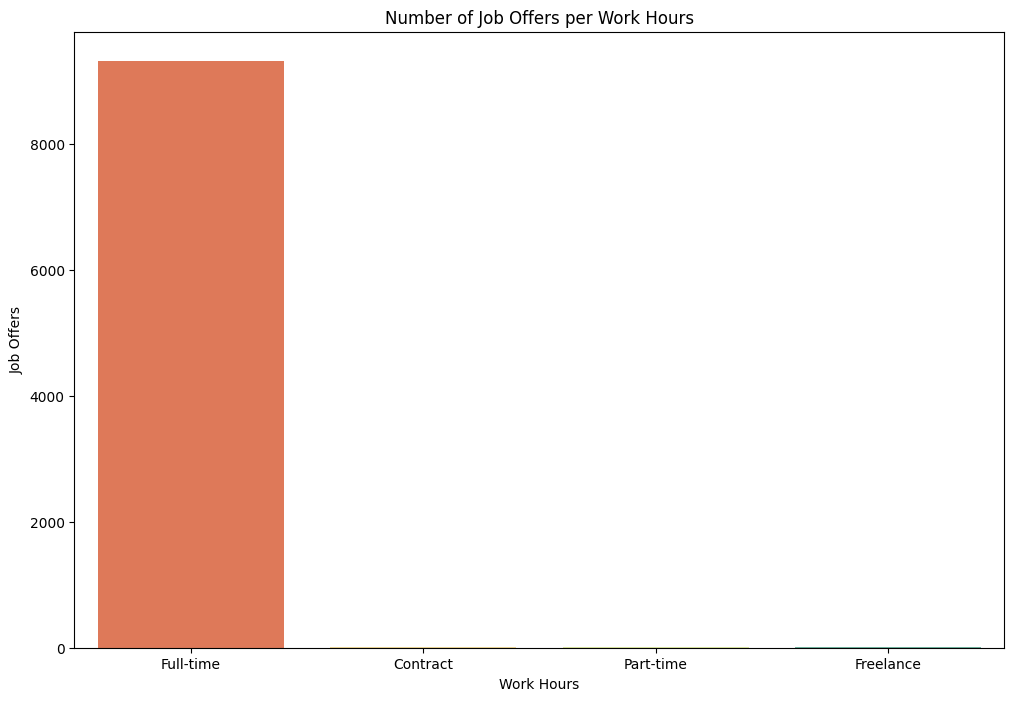

In [53]:
plt.figure(figsize=(12,8))
sns.barplot(x=type_count.index, y=type_count.values,palette='Spectral')
plt.title('Number of Job Offers per Work Hours')
plt.xlabel('Work Hours')
plt.ylabel('Job Offers')
plt.show()

## Visualisation 17: Salary Distribution by Work Hours

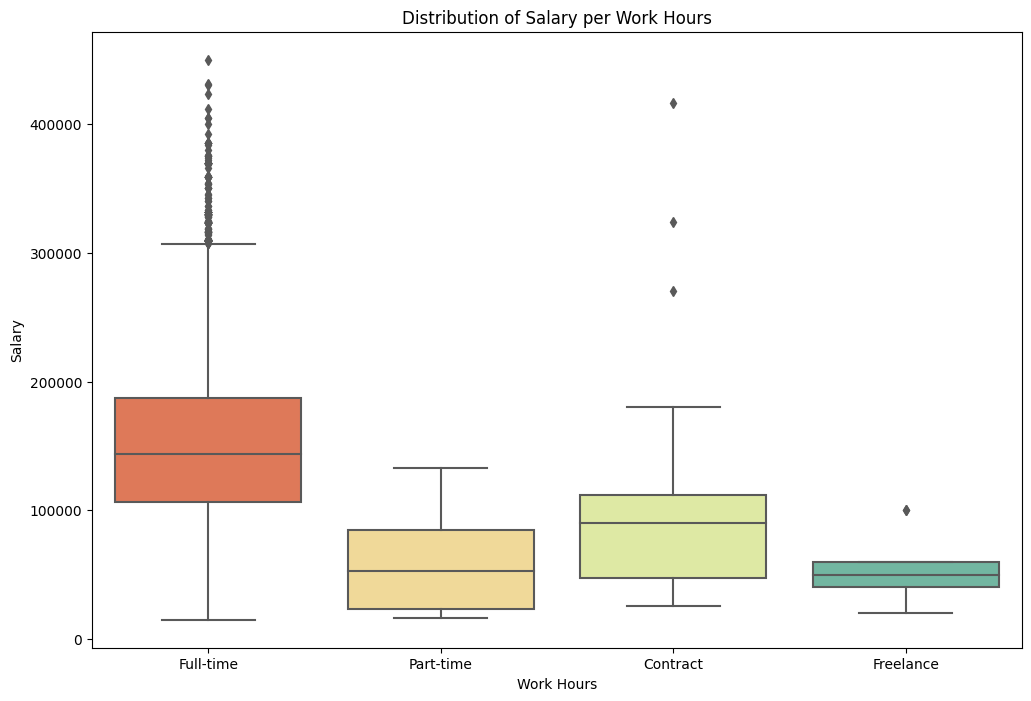

In [54]:
plt.figure(figsize=(12,8))
sns.boxplot(x='type',y='salary',data=df,palette='Spectral')
plt.title('Distribution of Salary per Work Hours')
plt.xlabel('Work Hours')
plt.ylabel('Salary')
plt.show()

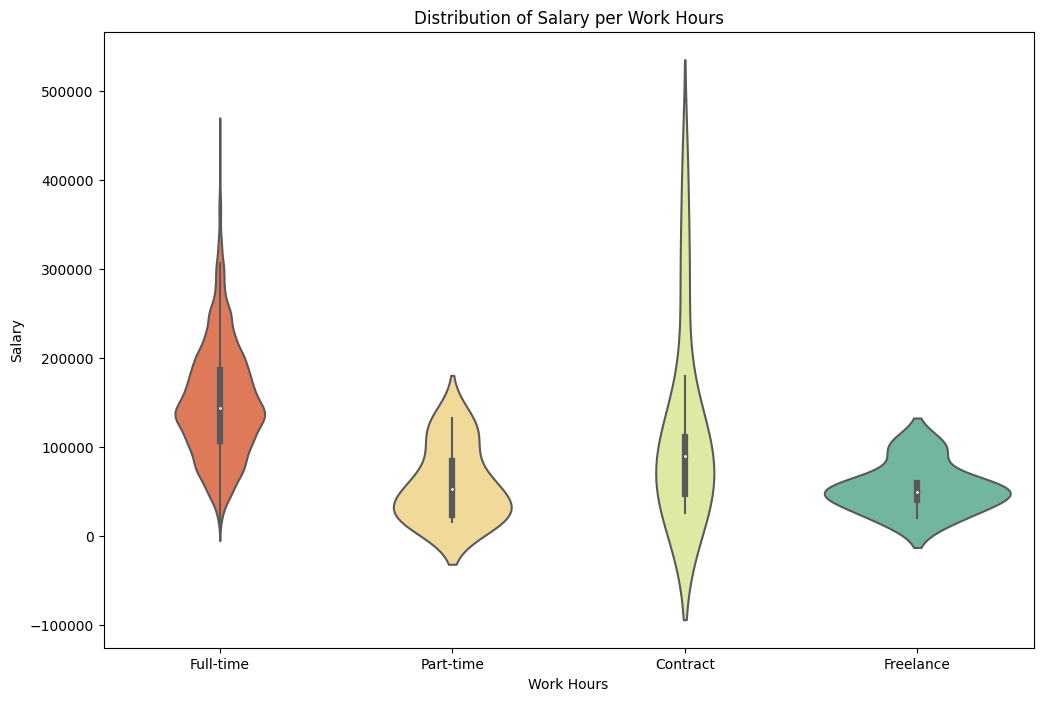

In [55]:
plt.figure(figsize=(12,8))
sns.violinplot(x='type',y='salary',data=df,palette='Spectral')
plt.title('Distribution of Salary per Work Hours')
plt.xlabel('Work Hours')
plt.ylabel('Salary')
plt.show()

# Conclusion

In conclusion I see that the majority of the job postings are from 2023 with an in-person setting on a full-time contract at a senior level in a medium sized company in the US.

The top 4 occupational categories, in terms of job offers, are:
- Data Scientist
- Data Engineer
- Data Analyst
- Machine Learning & AI

Cloud and Database has the highest minimumm salary starting at \\$115,000 and Data Science and Research has the highest maximum salary at \\$450,000.
BI and Visualization, Machine Learning and AI & Data Analysis have the lowest minimumm salary starting at \\$15,000 and Cloud and Database has the lowest maximum salary at \\$190,000.

The country with the highest average salary is Qatar and the countries with the lowest average salary is Indonesia & Thailand. The vast majority of job offers are in the US with the UK in second and Canada in third.
The job offers and salaries do increase over time.

The salaries do increase with an increase in experience level, so I can say that experience level does effect salary.
The job offers are somewhat influenced by experience level as the is a increase from entry-level to mid-level to senior but the a sharp decrease from senior to executive.

The salaries are not affected by the work setting.
The job offers are influenced by work setting as there is a majority for in-person work, an intermediate for remote work and a minority for hybrid work.

The salaries are affected by the size of the company with lower salaries for the small companies and higher salaries for the larger companies.
The job offers are influenced by the size of the company with a minority amount for a small company, an intermediate amount for a large company and a majority for a medium-sized company. This could be explained by the large company offering more internal promotions than external hirings, whereas small companies may not need to hire anyone or may not be able to afford it.

The salaries do increase with an increase in working hours, so I can say that working hours does effect salary.
The job offers are influenced by working hours as the massive bulk are for full-time employment and hardly any for the other types of employment.